In [89]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks", {'axes.facecolor': '#EAEAF2', 'axes.grid': True})
global savefig_additional

In [90]:
file_base = '/home/prajwal/Desktop/Winter_Project/SLP-Smoothed-Particle-Hydrodynamics/SLP/Taylor Green Vortex/PySPH-Testing/'

sph_schm = ['14', '18', '19']

sph_schm_legend = {
    '00':  r'$\delta$-SPH', '01': r'$\delta$-SPH, Prt', '02': 'DPSPH-SPH', 
    '03': 'DPSPH, Prt', '04': 'Case 1', '05': 'Case 2',
    '06': r'$\delta^+$-SPH', '07': r'$\delta^+$-SPH, Prt, QS, hdx=1', '08': 'EDAC, Prt',
    '09': 'EDAC', '10': r'$\delta^+$-SPH, Prt, TEOS', 
    '11': r'$\delta^+$-SPH, Prt, nx=30',
    '12': r'$\delta^+$-SPH, Prt, nx=30', '13': r'$\delta$-SPH, Prt, nx=30', 
    '14': 'EDAC, Prt, nx=30', '15':  r'$\delta^+$-SPH, Prt, WQK, hdx=2',
    '16': r'$\delta^+$-SPH, Prt, WQK, hdx=1.33', 
    '17': r'$\delta^+$-SPH, Prt, WQK, hdx=1.33, PST',
    '18': r'$\delta^+$-SPH, nx=30, Prt, WQK, hdx=1.33, PST',
    '19': r'$\delta^+$-SPH, nx=30, Prt, WQK, hdx=1.33',
    '20': 'Check1', '21': 'Check2'
    }
savefig_additional = ''

In [139]:
def custom_plot(sph_schm, sph_schm_legend, sz=(19.2,14.4), save=False):
    n = len(sph_schm)
    fig, axs = plt.subplots(2, 2, figsize=sz)

    cnt = 0
    for schm in sph_schm:        
        file_loc = file_base + '/Outputs/' + schm + '/results.npz'
        data = np.load(file_loc) # Read data
        leg = sph_schm_legend[schm]

        t, decay= data['t'], data['decay']
        
        axs[0,0].semilogy(t, decay, linewidth=2, label=leg)

        linf = data['linf']
        axs[0,1].plot(t, linf, linewidth=2, label=leg)

        l1 = data['l1']
        axs[1,0].plot(t, l1, linewidth=2, label=leg)

        p_l1 = data['p_l1']
        axs[1,1].plot(t, p_l1, linewidth=2, label=leg)

        cnt += 1
        if cnt == n:
            decay_ex =  data['decay_ex']
            axs[0,0].semilogy(t, decay_ex, '--k', linewidth=3, label="exact")

    # Labels
    axs[1,0].set_xlabel(r't $\rightarrow$')
    axs[1,1].set_xlabel(r't $\rightarrow$')

    # Titles
    fig.suptitle('Taylor-Green Vortex - Error Plots', fontsize=24)
    axs[0,0].set_title('Max Velocity in flow vs Time', fontsize='large')
    axs[0,1].set_title(r'$L_\infty$ error vs Time', fontsize='large')
    axs[1,0].set_title(r'$L_1$ error vs Time', fontsize='large')
    axs[1,1].set_title(r'$L_1$ error for $p$ vs Time', fontsize='large')

    fig.tight_layout()
    fig.subplots_adjust(top=0.9, bottom=0.1)
    lines = []
    labels = []
    for ax in fig.axes:
        axLine, axLabel = ax.get_legend_handles_labels()
        lines.extend(axLine)
        labels.extend(axLabel)

    n += 1
    fig.legend(lines[0:n], labels[0:n], loc = 'lower center', ncol=n, prop={'size': 16})

    if save == True:
        tle = file_base + '/TGV_Error_Plot' + savefig_additional + '.png' 
        fig.savefig(tle, dpi=400)

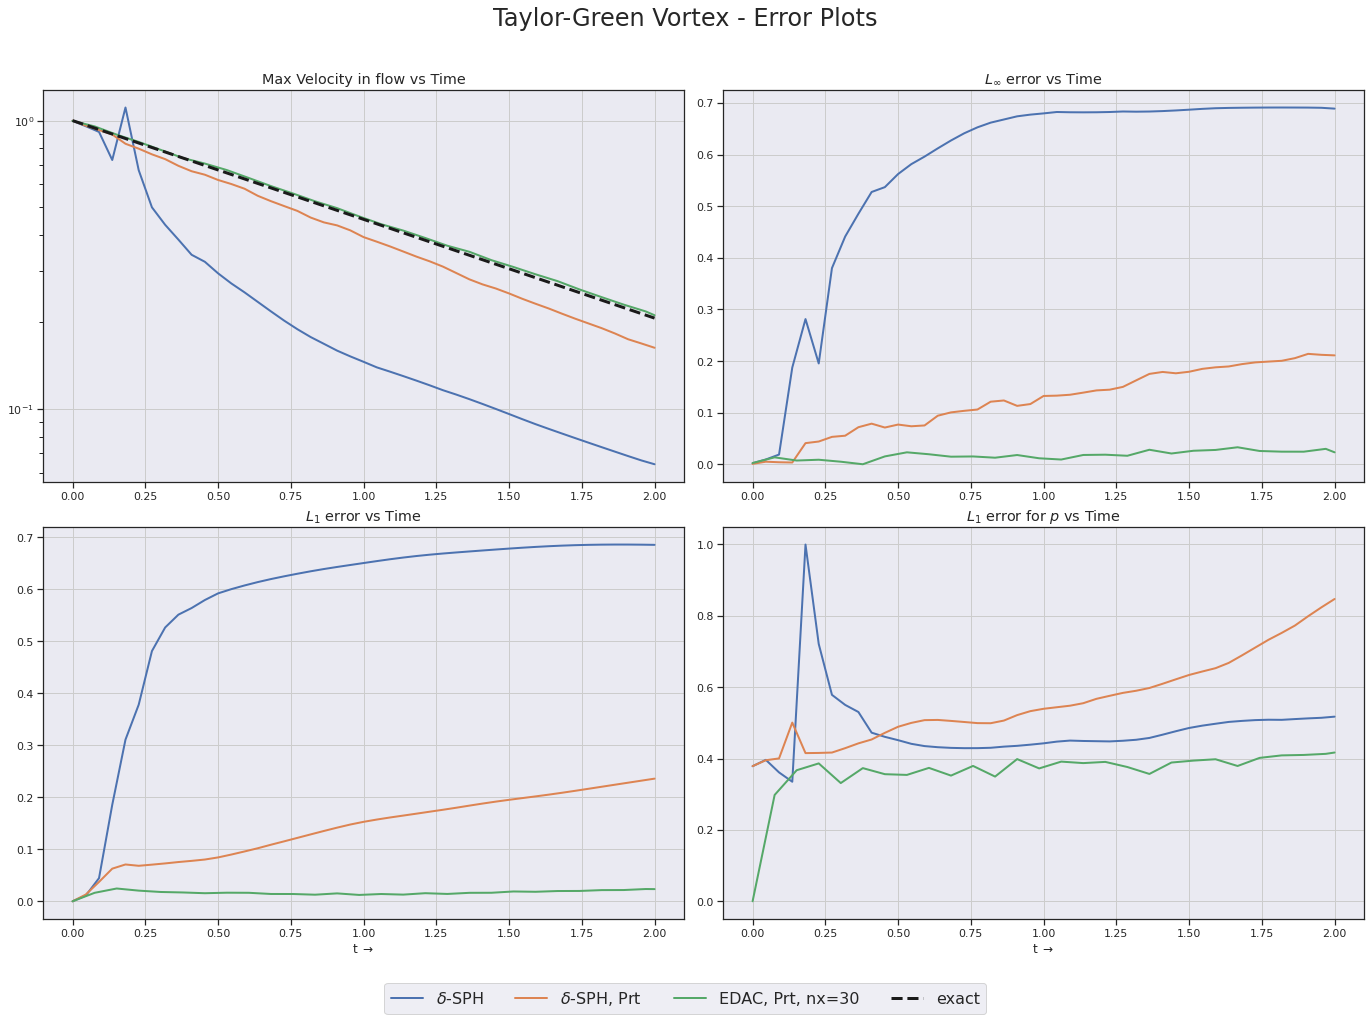

In [140]:
custom_plot(['00', '01', '14'], sph_schm_legend, save=True)

In [141]:
def extract_RT(file_loc):

    from os import walk
    files = []
    for (dirpath, dirnames, filenames) in walk(file_loc):
        files.extend(filenames)
        break

    fname = ''
    for i in files:
        if i.endswith('.log'):
            fname = i

    file_loc += '/' + fname
    data = open(file_loc, 'r')
    lines = data.read()
    rt = float(lines[lines.find('Run took: ')+10:].split(' secs')[0])
    data.close()

    return rt

def run_time_plot(sph_schm, sph_schm_legend, sz=(19.2,14.4), save = False):
    
    RT_x, RT_y = [], []
    for schm in sph_schm:
        file_loc = file_base + '/Outputs/' + schm 
        # Read data
        RT_y.append(extract_RT(file_loc))
        RT_x.append(sph_schm_legend[schm])
        
    # Plotting
    fig, ax = plt.subplots(figsize=sz)

    # Horizontal Bar Plot 
    ax.barh(RT_x, RT_y, height=0.4)
    # Remove axes splines 
    for s in ['top', 'bottom', 'left', 'right']: 
        ax.spines[s].set_visible(False) 
    
    # Remove x, y Ticks 
    ax.xaxis.set_ticks_position('none') 
    ax.yaxis.set_ticks_position('none') 

    ax.set_xlabel(r'Run time (second) $\rightarrow$')
    
    # Add x, y gridlines 
    ax.grid(b = True, color ='black', linestyle ='-.', linewidth = 0.7, alpha = 0.2) 
    
    # Add annotation to bars 
    for i in ax.patches: 
        plt.text(i.get_width(), i.get_y()+0.2,  
                str(round((i.get_width()), 2)), 
                fontsize = 11, fontweight ='bold', 
                color ='grey') 
    
    # Add Plot Title 
    ax.set_title('Run Time - SPH Schemes', fontsize=24) 
    if save == True:
        tle = file_base + '/run_time_1' + savefig_additional + '.png' 
        fig.savefig(tle, dpi=400)

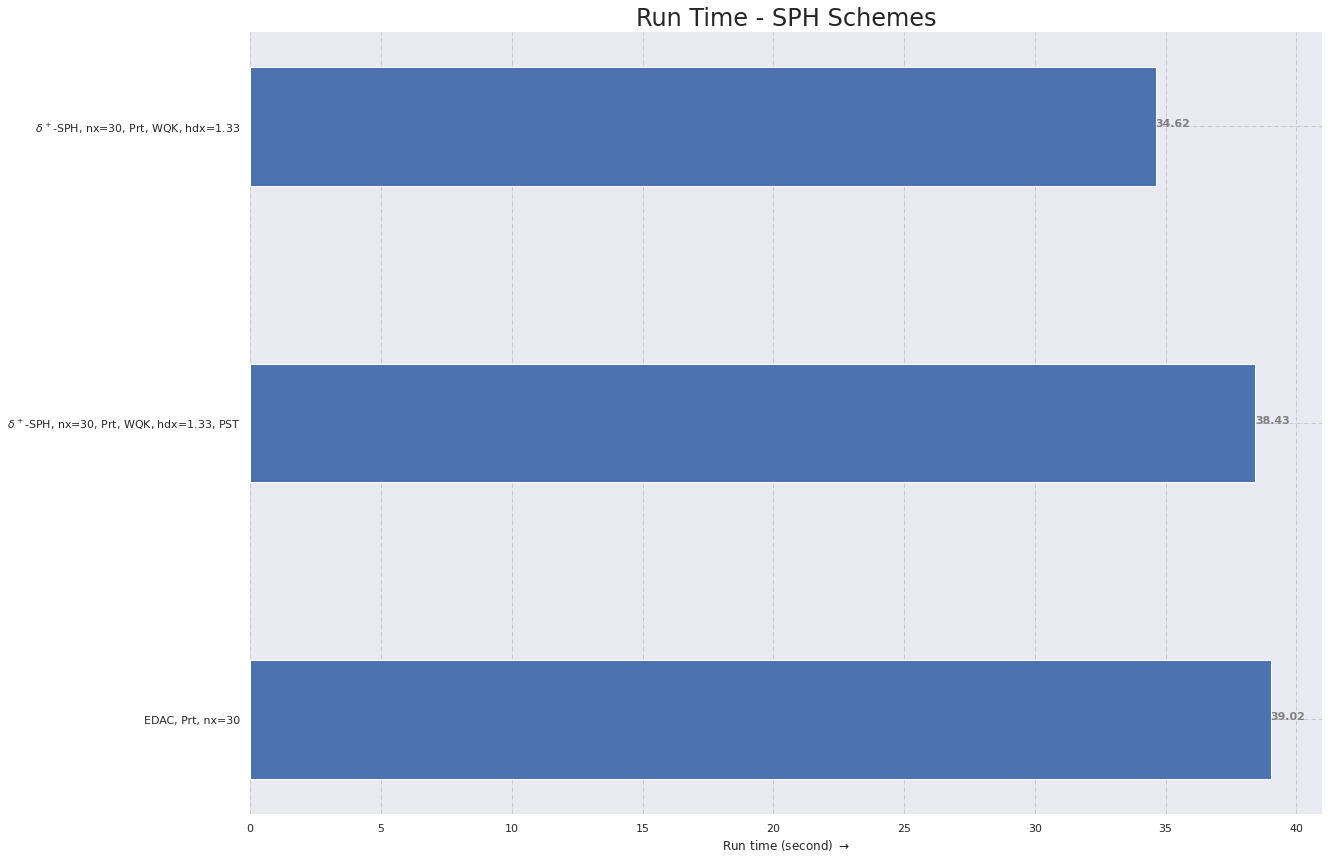

In [142]:
run_time_plot(sph_schm, sph_schm_legend, save = True)